In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
x_train = train_data.loc[:, 'X']
y_train = train_data.loc[:, 'Y']
x_test = test_data.loc[:, 'X']
y_test = test_data.loc[:, 'Y']

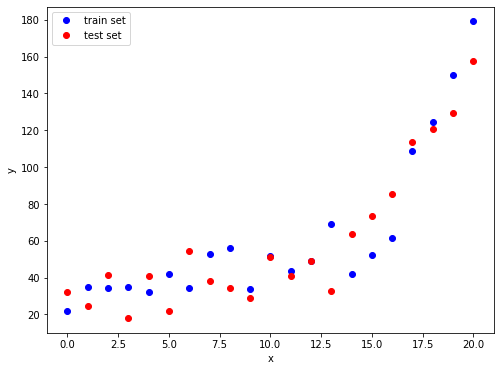

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'ob', label='train set')
plt.plot(x_test, y_test, 'or', label='test set')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [5]:
poly_order = np.linspace(1, 10, 10, dtype=int) #(เริ่มที่, สิ้นสุดที่, กี่ตัว)
poly_order

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

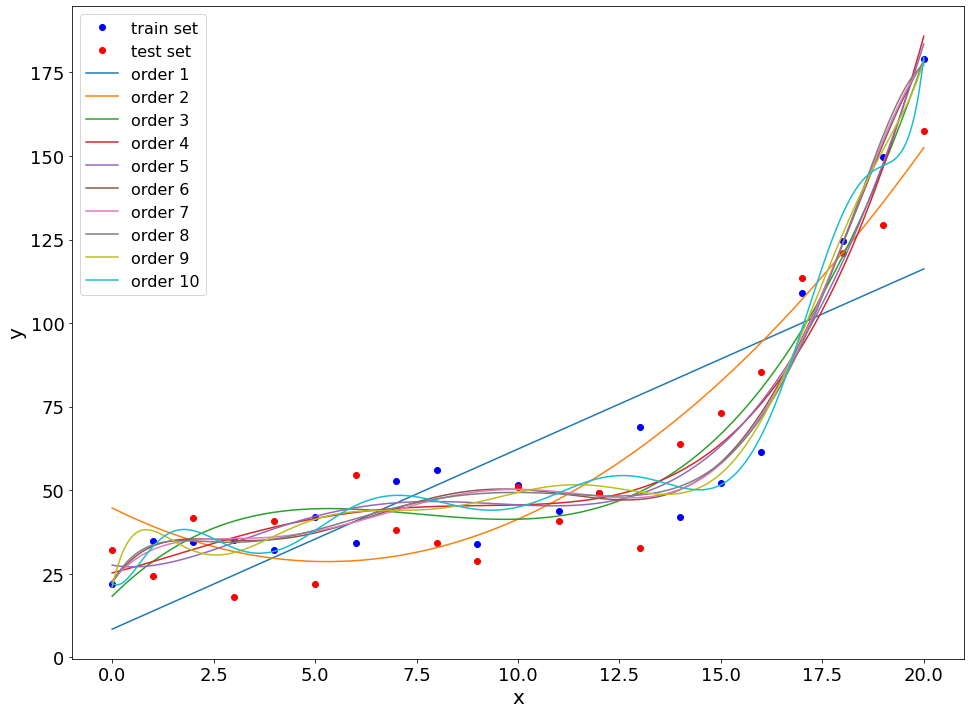

In [6]:
plt.figure(figsize=(16, 12))
plt.plot(x_train, y_train, 'ob', label='train set')
plt.plot(x_test, y_test, 'or', label='test set')

for n in poly_order:
    fit_param = np.polyfit(x_train, y_train, n)  # ได้สปส.
    fit_poly = np.poly1d(fit_param)  # ได้สมการ

    x_plot = np.linspace(0, 20, 10001)
    y_plot = fit_poly(x_plot)

    plt.plot(x_plot, y_plot, '-', label='order '+str(n))
    plt.xlabel('x', fontsize='20')
    plt.ylabel('y', fontsize='20')
    plt.xticks(fontsize='18')
    plt.yticks(fontsize='18')
    plt.legend(loc='upper left', fontsize='16')
plt.show()

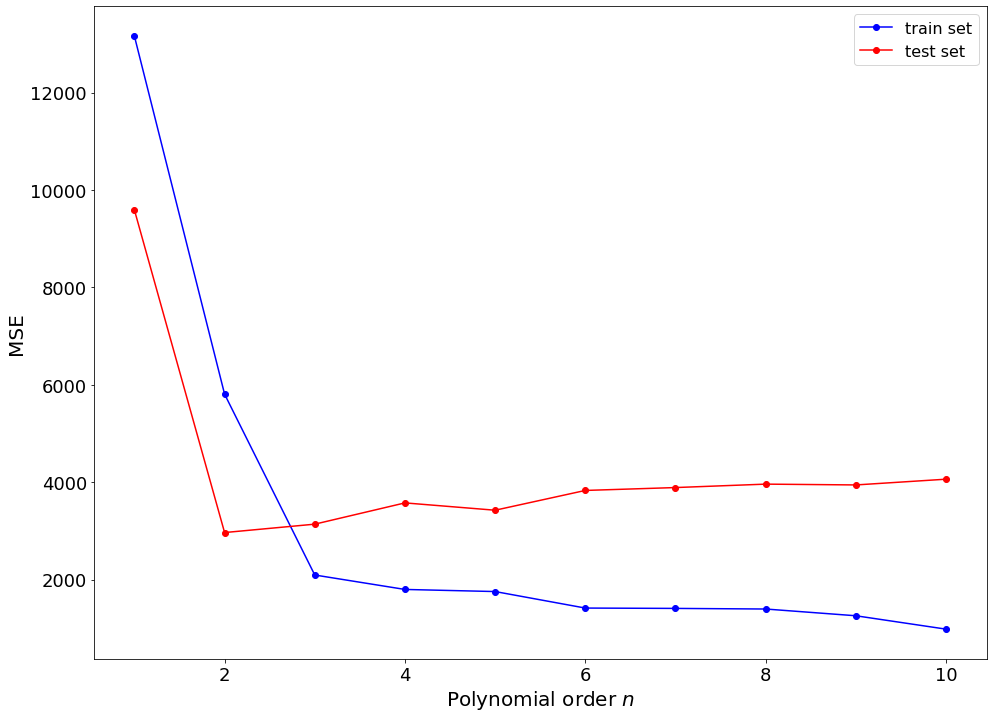

In [7]:
# ----- Calulate MSE ----- #

def cal_mse(y_data, y_predict):
    mse = np.sum((y_data-y_predict)**2)
    return mse

mse_train_set = np.zeros(len(poly_order)) 
mse_test_set = np.zeros(len(poly_order))

for i in range(len(poly_order)):
    n = poly_order[i]

    fit_param = np.polyfit(x_train, y_train, n)  # ได้สปส.
    fit_poly = np.poly1d(fit_param)  # ได้สมการ

    y_pre_train = fit_poly(x_train)
    y_pre_test = fit_poly(x_test)

    mse_train = cal_mse(y_train, y_pre_train)
    mse_test = cal_mse(y_test, y_pre_test)

    mse_train_set[i] = mse_train
    mse_test_set[i] = mse_test

plt.figure(figsize=(16, 12))
plt.plot(poly_order, mse_train_set, '-ob', label='train set')
plt.plot(poly_order, mse_test_set, '-or', label='test set')
plt.xlabel('Polynomial order $n$', fontsize='20')
plt.ylabel('MSE', fontsize='20')
plt.xticks(fontsize='18')
plt.yticks(fontsize='18')
plt.legend(loc='upper right', fontsize='16')
plt.show()

สำหรับ train data  
Polynomial order น้อย (n=1) จะ fit ข้อมูลได้แย่ที่สุด  
และจะ fit ข้อมูลได้ดีขึ้นเรื่อยๆ เมื่อมี Polynomial order มากขึ้น

สำหรับ test data  
Polynomial order น้อย (n=1) จะ fit ข้อมูลได้แย่ที่สุด เหมือน train data  
และจะ fit ข้อมูลได้ดีขึ้น เมื่อมี Polynomial order มากขึ้น  
และเมื่อ Polynomial order เลยค่าๆหนี่ง จะเริ่ม fit ข้อมูลได้แย่ขึ้นเรื่อยๆ  
ซึ่ง Polynomial order ค่านั้นคือ n=2 (ดูจากกราฟ mse ของเส้น test set ที่มีค่า mse ต่ำสุด)  

ดังนั้น Polynomial order 2 จึงเหมาะสมที่สุดในการ fit ข้อมูลชุดนี้ (จาก test data)